In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [3]:
dataset = load_digits()
dataset.data.shape

(1797, 64)

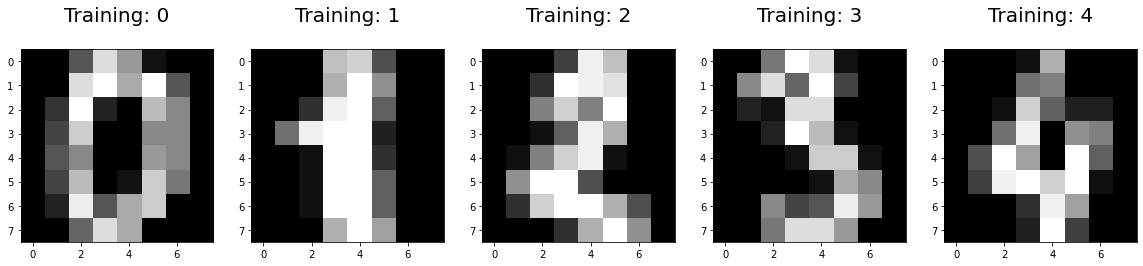

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(dataset.data[0:5], dataset.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
   dataset.data, dataset.target, test_size=0.25, random_state=0)

In [8]:
from sklearn.linear_model import LogisticRegression 
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [9]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [10]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [11]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


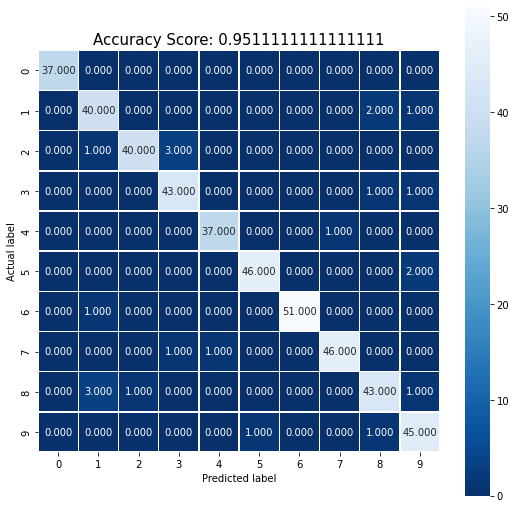

In [12]:
plt.figure(figsize=(9,9))
predictions = logisticRegr.predict(x_test)
sns.heatmap(metrics.confusion_matrix(y_test, predictions), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [13]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

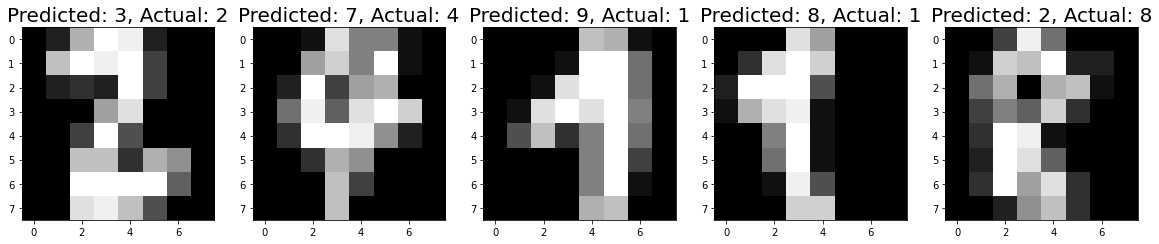

In [14]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)